In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
wine.target.shape

(178,)

# Applying KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=6)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=9,metric='mahalanobis',metric_params={'V':np.cov(X_train, rowvar=False)})
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


Before applying the metric as Mahalanobis the accuracy was 0.75. It improved to 0.92 which is a much better result. 

 Elbow method to find the best value of K (the best value I got is 9 from the elbow method)

In [ ]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1,21):
    knn = KNeighborsClassifier(metric='mahalanobis',metric_params={'V':np.cov(X_train, rowvar=False)}, n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

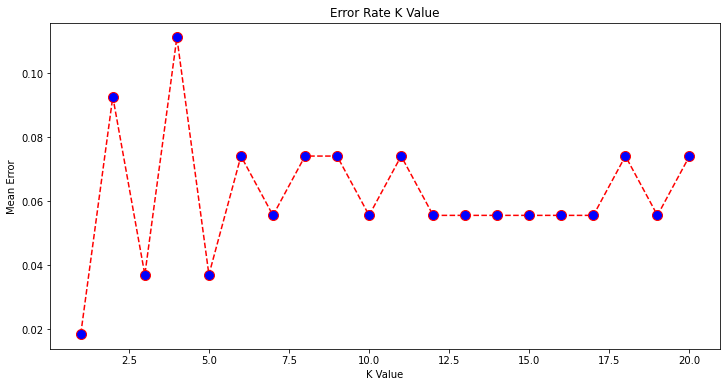

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Applying cross validation

We select the data validation after observing the data if it is balanced or unbalanced. Here the wine dataset is a balance dataset so Kfold validation will be approaprite for this dataset. If the data would be a highly imbalanced one then Stratified cross validation would give a better result. Similarly for continuos chanaging data we could use Time series cv.

In [ ]:
from sklearn.model_selection import KFold
k = 3
cv = KFold(n_splits = k, shuffle = True)
for train_index, test_index in cv.split(wine.data,wine.target): #y is only necessary for stratified splits
  print(train_index, "/", test_index)

[  1   3   4   5   6   9  11  15  17  18  20  21  22  23  24  25  27  28
  29  33  34  35  36  37  39  41  42  43  44  46  49  51  52  54  56  57
  58  59  60  61  62  63  64  67  68  69  70  71  75  76  78  79  81  82
  83  84  85  86  87  88  89  90  91  93  94  95  96  97  99 100 101 102
 104 107 108 109 110 111 114 115 116 117 118 120 123 124 125 126 127 129
 130 131 132 133 134 135 138 139 140 142 144 146 149 151 152 155 156 157
 159 167 168 169 170 171 172 173 176 177] / [  0   2   7   8  10  12  13  14  16  19  26  30  31  32  38  40  45  47
  48  50  53  55  65  66  72  73  74  77  80  92  98 103 105 106 112 113
 119 121 122 128 136 137 141 143 145 147 148 150 153 154 158 160 161 162
 163 164 165 166 174 175]
[  0   1   2   7   8   9  10  11  12  13  14  16  17  18  19  22  24  26
  28  29  30  31  32  33  34  35  37  38  40  44  45  46  47  48  49  50
  53  54  55  58  61  62  64  65  66  69  71  72  73  74  75  76  77  79
  80  82  83  84  85  86  87  90  92  93  94  97  98 1

In [ ]:
from sklearn.metrics import accuracy_score
scores = np.zeros(k)
i = 0
X = wine.data
y = wine.target
for train_index, test_index in cv.split(wine.data):
  X_train, X_test = wine.data[train_index], wine.data[test_index]
  y_train, y_test = wine.target[train_index], wine.target[test_index]
    
    
  knn = KNeighborsClassifier(n_neighbors=9,metric='mahalanobis',metric_params={'V':np.cov(X_train, rowvar=False)})
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  scores[i] = accuracy_score(y_test, y_pred)
  i += 1

print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.91666667 0.91525424 0.94915254]
0.9270244821092279
0.015657522738527222


In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=9,metric='mahalanobis',metric_params={'V':np.cov(X_train, rowvar=False)})
scores = cross_val_score(clf,  wine.data, wine.target, cv = cv)

print(np.mean(scores))
print(np.std(scores))
print(scores.min())
print(scores.max())

0.9155367231638417
0.04814043369736703
0.847457627118644
0.95


We can tune the parameter to search for better results or to decrease the difference between min and max values.

# Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_neighbors' : list(range(1,15)),
               'p' : list(range(1,7))}

search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs =-1)
search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='mahalanobis',
                                            metric_params={'V': array([[ 6.62470588e-01,  8.64702891e-02,  3.48164506e-02,
        -8.07683450e-01,  2.40305085e+00,  1.53910818e-01,
         2.13119442e-01, -1.60431206e-02,  7.02129611e-02,
         9.15997358e-01, -2.90234297e-03,  7.25838485e-02,
         1.69899093e+02],
       [ 8.64...
         1.65696060e+02, -1.12937915e+01,  6.60848191e+01,
         2.28932266e+02,  1.78724412e+01,  8.13079974e+01,
         1.06979241e+05]])},
                                            n_jobs=None, n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                

In [ ]:
search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 6.62470588e-01,  8.64702891e-02,  3.48164506e-02,
        -8.07683450e-01,  2.40305085e+00,  1.53910818e-01,
         2.13119442e-01, -1.60431206e-02,  7.02129611e-02,
         9.15997358e-01, -2.90234297e-03,  7.25838485e-02,
         1.69899093e+02],
       [ 8.64702891e-02,  1.14725713e+00,  3.76763709e-02,
         1.1305...
         5.72884005e-01, -4.58283008e-02,  2.04937844e-01,
        -6.90814920e-01,  9.80576841e-02,  5.01708218e-01,
         8.13079974e+01],
       [ 1.69899093e+02, -6.38388185e+01,  1.68544780e+01,
        -5.02998248e+02,  1.59491646e+03,  1.05418334e+02,
         1.65696060e+02, -1.12937915e+01,  6.60848191e+01,
         2.28932266e+02,  1.78724412e+01,  8.13079974e+01,
         1.06979241e+05]])},
                     n_jobs=None, n_neighbors=3, p=1, weights='uniform')

In [ ]:
k = search.cv_results_['param_n_neighbors']
p = search.cv_results_['param_p']
scores = search.cv_results_['mean_test_score']

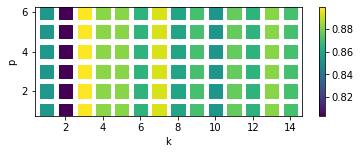

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,2))
plt.scatter(k, p, c=scores, marker='s', s=180)
plt.xlabel('k')
plt.ylabel('p')
plt.colorbar()
plt.show()

From this grid search we can see the best K value is 3

In [ ]:
grid_params =[{'n_neighbors' : list(range(1,15)), 
             'metric': ['euclidean', 'minkowski','mahalanobis'],
            'p' : list(range(1,7))}]
search2 = GridSearchCV(clf, grid_params, scoring = 'accuracy', n_jobs =-1)
search2.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='mahalanobis',
                                            metric_params={'V': array([[ 6.62470588e-01,  8.64702891e-02,  3.48164506e-02,
        -8.07683450e-01,  2.40305085e+00,  1.53910818e-01,
         2.13119442e-01, -1.60431206e-02,  7.02129611e-02,
         9.15997358e-01, -2.90234297e-03,  7.25838485e-02,
         1.69899093e+02],
       [ 8.64...
         2.28932266e+02,  1.78724412e+01,  8.13079974e+01,
         1.06979241e+05]])},
                                            n_jobs=None, n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'metric': ['euclidean', 'minkowski', 'mahalanobis'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13,

In [ ]:
search2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='mahalanobis',
                     metric_params={'V': array([[ 6.62470588e-01,  8.64702891e-02,  3.48164506e-02,
        -8.07683450e-01,  2.40305085e+00,  1.53910818e-01,
         2.13119442e-01, -1.60431206e-02,  7.02129611e-02,
         9.15997358e-01, -2.90234297e-03,  7.25838485e-02,
         1.69899093e+02],
       [ 8.64702891e-02,  1.14725713e+00,  3.76763709e-02,
         1.1305...
         5.72884005e-01, -4.58283008e-02,  2.04937844e-01,
        -6.90814920e-01,  9.80576841e-02,  5.01708218e-01,
         8.13079974e+01],
       [ 1.69899093e+02, -6.38388185e+01,  1.68544780e+01,
        -5.02998248e+02,  1.59491646e+03,  1.05418334e+02,
         1.65696060e+02, -1.12937915e+01,  6.60848191e+01,
         2.28932266e+02,  1.78724412e+01,  8.13079974e+01,
         1.06979241e+05]])},
                     n_jobs=None, n_neighbors=3, p=1, weights='uniform')

The best option I found for k value is 3 and the distance metric is Mahalanobis.

In [ ]:
search2.best_params_

{'metric': 'mahalanobis', 'n_neighbors': 3, 'p': 1}

In [ ]:
from sklearn.model_selection import KFold
model = KNeighborsClassifier(metric = 'mahalanobis',metric_params={'V':np.cov(X_train, rowvar=False)}, n_neighbors= 3, p= 1)
Kfold_Validation = KFold(10)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,  wine.data, wine.target, cv = cv)

print(np.mean(scores))
print(np.std(scores))
print(scores.min())
print(scores.max())

0.9098870056497175
0.03514878114145401
0.864406779661017
0.95


After applying best parameters to the KNN model the difference between the min and mx has decreased.

# KMeans Clustering

In [ ]:
cls = KMeans(n_clusters=3)
cls.fit(X)
y_pred = cls.predict(X)

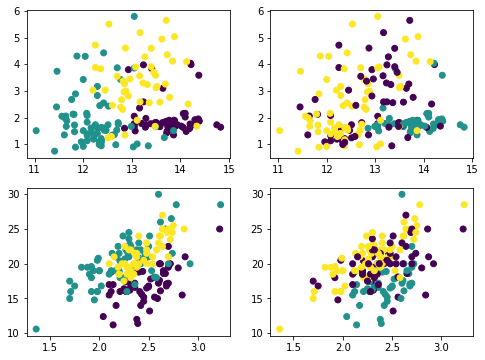

In [ ]:
plt.figure(figsize=[8,6])

plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y)

plt.subplot(2,2,2)
plt.scatter(X[:,0],X[:,1],c=y_pred)

plt.subplot(2,2,3)
plt.scatter(X[:,2],X[:,3],c=y)

plt.subplot(2,2,4)
plt.scatter(X[:,2],X[:,3],c=y_pred)

Text(0, 0.5, 'Inertia')

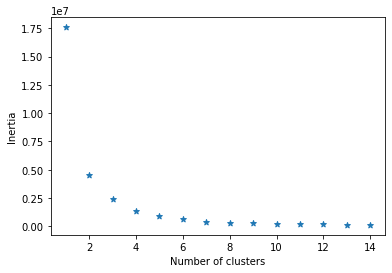

In [ ]:
squares = []
for n in range(1,15):
  cls = KMeans(n_clusters=n)
  cls.fit(X)
  squares.append(cls.inertia_)
plt.scatter(range(1,15),squares,marker='*') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 2 to 4. So 3 is the optimum cluster value here.

In [ ]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cls.inertia_

123295.08033034153

The value of inertia decreases as the number of clusters increase. So, its a trade-off here. Rule of thumb: The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn't significant. K=3 is the optimal choice.